<a href="https://colab.research.google.com/github/Gogula14/CE888_Assignment/blob/main/_Infant_Health_Development_Program_Predicting_the_cognitive_test_score_for_a_child.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#import warnings warnings.filterwarnings("ignore")

The Infant Health Development Program (IHDP) dataset was collected to investigate the effect of highquality childcare and home visits on the future cognitive test score of low-birth-weight, premature infants.
The dataset contains 25 features, including measurements about the child (e.g., child-birth weight, head
circumference, weeks born preterm, birth order, first born, neonatal health index, sex...) and information
about the mother at the time she gave birth (e.g., age, marital status, educational attainment, whether
she worked) and her behaviours during the pregnancy (e.g., whether she smoked cigarettes, drank alcohol,
took drugs...). These are background variables X. The treatment variable (t) indicates whether a family
was part of the control (i.e., t = 0, no support was provided) or the treatment (i.e., t = 1, support was
provided) group. The outcome column records the cognitive test score for the child. The dataset was
introduced in [1] based on a clinical trial [2]. We use a semi-synthetic version of the data, where the
outcomes (both factual and counterfactual) are simulated (with some added random noise) based on real
pre-treatment covariates. For this reason, the dataset also includes true (noiseless) individualised effects
per each data unit, which are better suited for performance evaluation than the outcomes due to lack of
noise. The use of counterfactuals/true effects is forbidden in the training stage (evaluation only).

In [2]:
#reading the second dataset
data2 = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv")
data2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [ ]:
#finding the relation between yf, ycf and ite


In [ ]:
#observing the shape and size of the dataset
data2.shape

(747, 29)

In [ ]:
data2.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.626431e-17,2.348263e-17,-4.666801e-17,-9.012574e-16,4.518177e-17,-7.251376e-16,0.514056,0.093708,0.520750,0.364123,...,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,...,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## it can be obeserved that the columns named x1, x2,x3,x4,x5, x6 , yf, ycf,ite are numeric variables

## and the columns x7-x25 and t are binary variables

In [ ]:
num_cols=['x1','x2','x3','x4','x5','x6','yf','ycf','ite']
bin_cols=['x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','t']

In [ ]:
for i in data2.columns:
  print("The unique values in", i, "are:", data2[i].unique(),"\n")

The unique values in x1 are: [ 1.39739503  0.26903265  1.05153683  0.66244636  0.8569916  -0.35351211
  1.09476911 -0.39674438  0.05719451  0.81375932 -1.8450256   0.72729477
  1.11638525 -0.34486565  1.15961752 -0.37512825 -0.15896687  0.38143657
 -0.78583486 -2.29896449  0.94345615  1.24608207  0.16527519  0.07881064
 -1.65048036 -0.82906713 -0.31027983 -0.11573459  0.70567863  0.25173974
  0.74891091 -1.82340946 -1.21815761  0.77052704  0.83537546  1.50547572
  1.00830456 -0.91553168 -0.24543142 -0.00765391 -0.20219914  1.44062731
 -0.95876396  1.2028498  -1.04522851 -0.56967348  0.33820429  0.02260869
  1.41901117  0.14365906 -1.43431899  0.24309329  0.12204292  1.07315297
  1.28931435  1.18123366  0.79214318 -0.69937031  0.44628498 -0.76421872
  0.23012361 -1.90987401  0.01396223  0.42466884 -0.85068327  0.18689133
 -1.26138988 -0.28866369  0.59759794 -1.93149015  0.20850747 -1.75856105
 -1.3262383  -1.99633856 -1.60724809 -0.18058301  0.3706285  -0.72098645
 -0.74260258 -1.131693

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

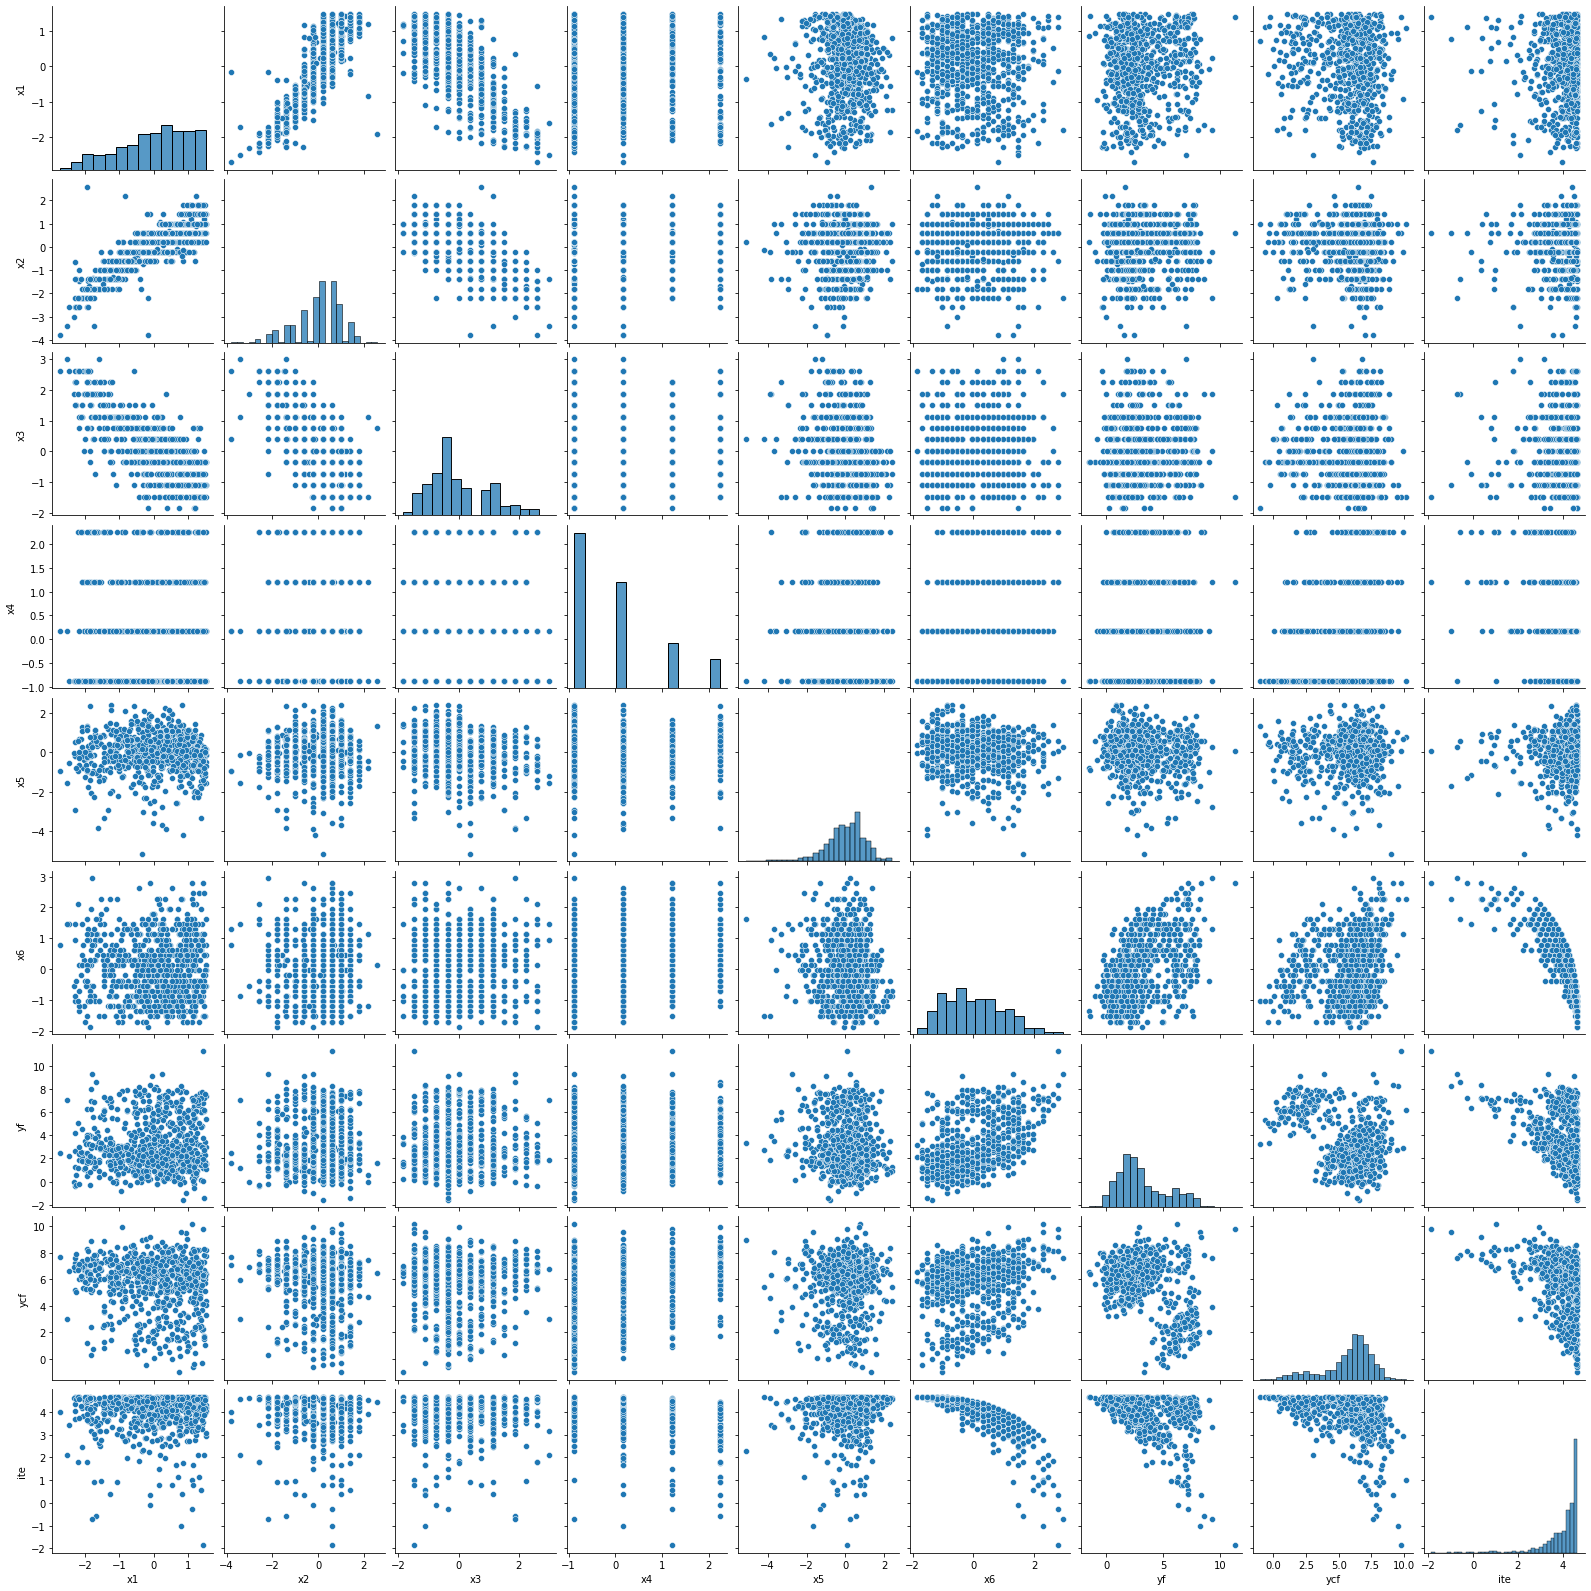

In [ ]:
sns.pairplot(data2[num_cols])
plt.show()

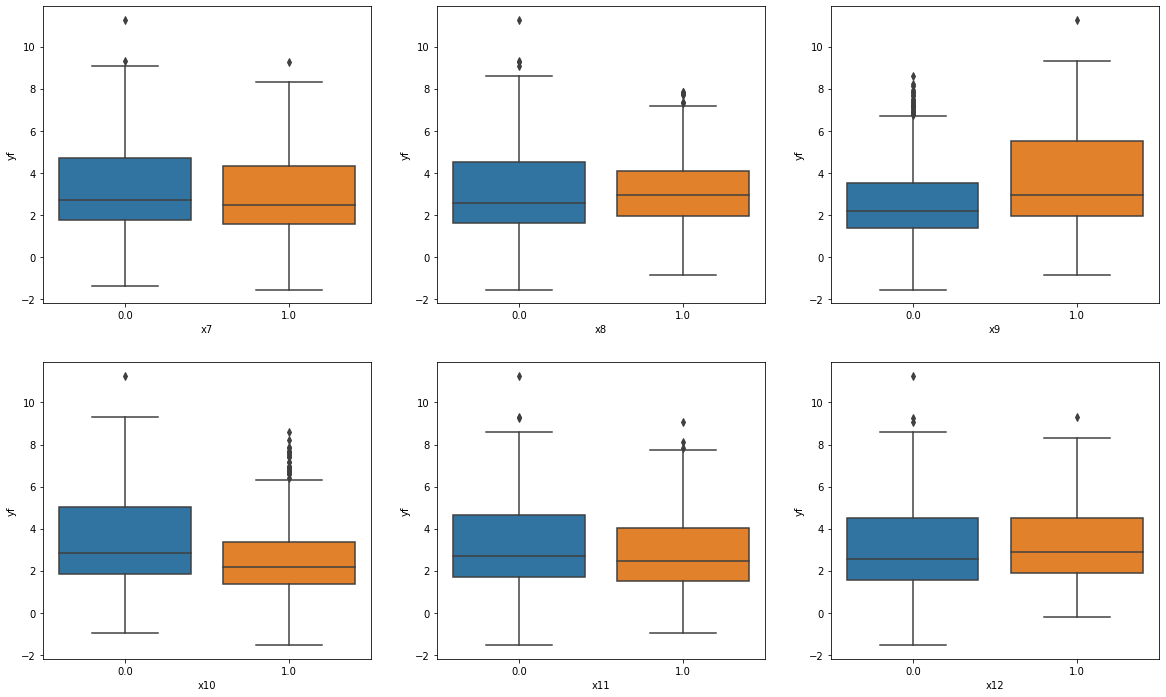

In [ ]:
#  'x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25'

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'x7', y = 'yf', data = data2)
plt.subplot(2,3,2)
sns.boxplot(x = 'x8', y = 'yf', data = data2)
plt.subplot(2,3,3)
sns.boxplot(x = 'x9', y = 'yf', data = data2)
plt.subplot(2,3,4)
sns.boxplot(x = 'x10', y = 'yf', data = data2)
plt.subplot(2,3,5)
sns.boxplot(x = 'x11', y = 'yf', data = data2)
plt.subplot(2,3,6)
sns.boxplot(x = 'x12', y = 'yf', data = data2)
plt.show()

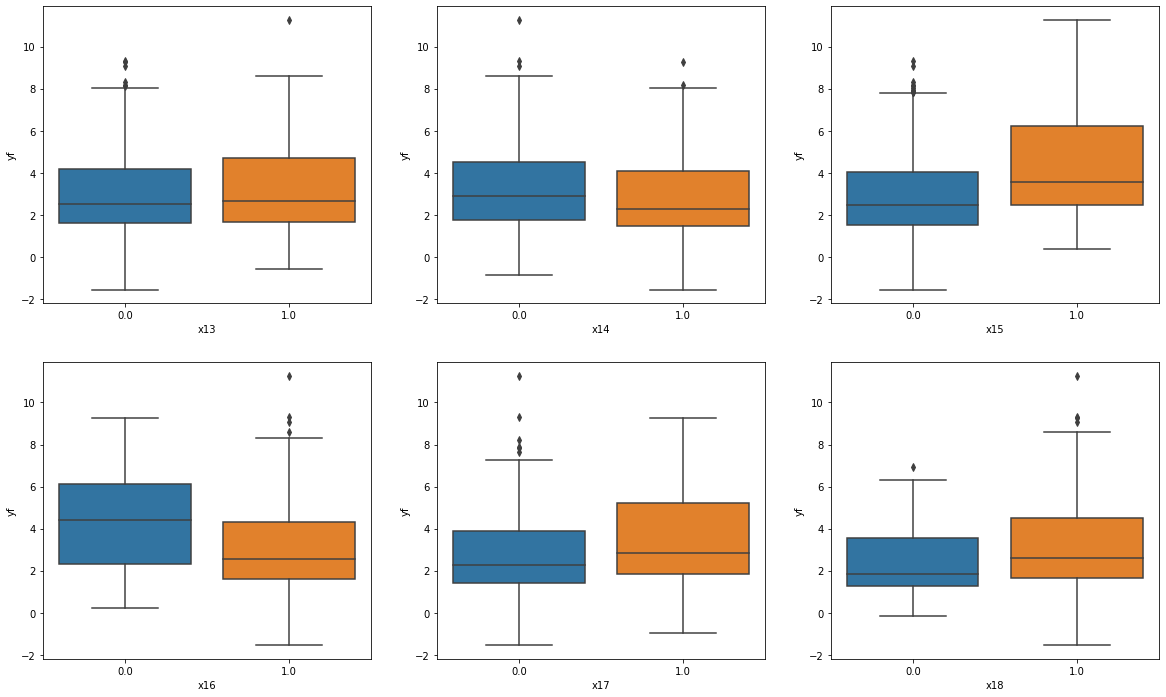

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'x13', y = 'yf', data = data2)
plt.subplot(2,3,2)
sns.boxplot(x = 'x14', y = 'yf', data = data2)
plt.subplot(2,3,3)
sns.boxplot(x = 'x15', y = 'yf', data = data2)
plt.subplot(2,3,4)
sns.boxplot(x = 'x16', y = 'yf', data = data2)
plt.subplot(2,3,5)
sns.boxplot(x = 'x17', y = 'yf', data = data2)
plt.subplot(2,3,6)
sns.boxplot(x = 'x18', y = 'yf', data = data2)
plt.show()

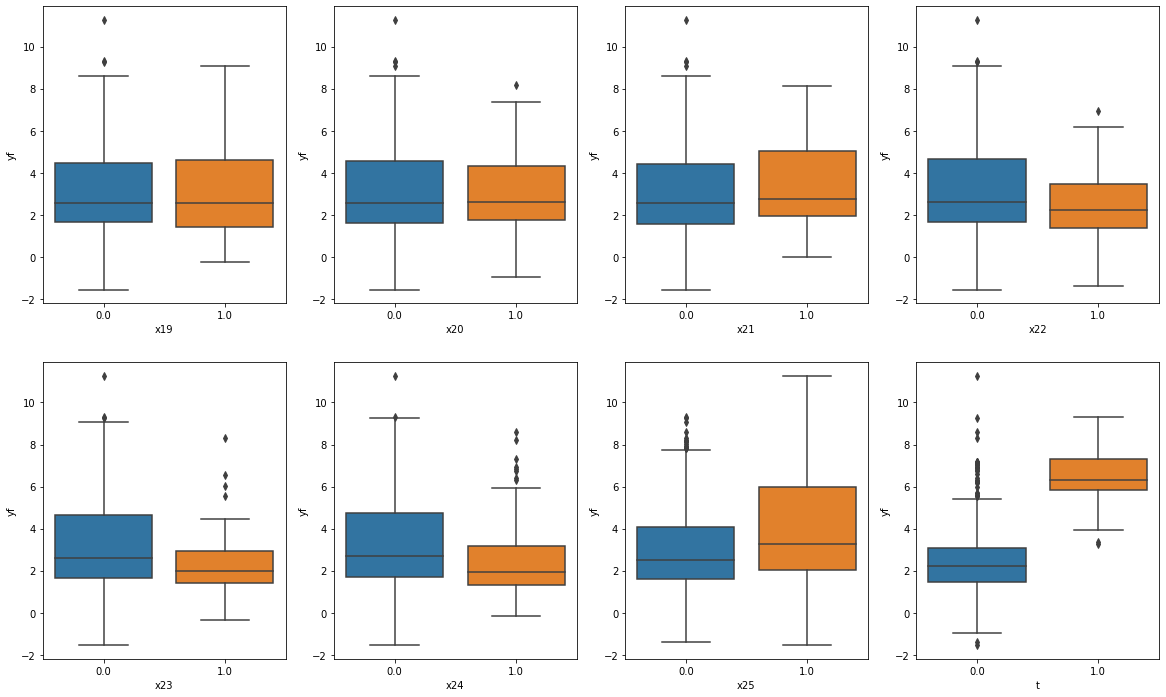

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'x19', y = 'yf', data = data2)
plt.subplot(2,4,2)
sns.boxplot(x = 'x20', y = 'yf', data = data2)
plt.subplot(2,4,3)
sns.boxplot(x = 'x21', y = 'yf', data = data2)
plt.subplot(2,4,4)
sns.boxplot(x = 'x22', y = 'yf', data = data2)
plt.subplot(2,4,5)
sns.boxplot(x = 'x23', y = 'yf', data = data2)
plt.subplot(2,4,6)
sns.boxplot(x = 'x24', y = 'yf', data = data2)
plt.subplot(2,4,7)
sns.boxplot(x = 'x25', y = 'yf', data = data2)
plt.subplot(2,4,8)
sns.boxplot(x = 't', y = 'yf', data = data2)

plt.show()

## Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data2, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the binary variables

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
444,0.881720,0.5625,0.307692,0.000000,0.475000,0.214286,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.225581,0.710641,0.991334
500,0.854839,0.8125,0.230769,0.333333,0.716667,0.571429,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.720718,0.243245,0.866091
58,0.978495,0.6875,0.076923,0.666667,0.691667,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.967361,0.000000
244,0.591398,0.6875,0.307692,0.000000,0.750000,0.428571,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349045,0.566445,0.885766
487,0.413978,0.5000,0.538462,0.000000,0.633333,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357529,0.547486,0.944059


In [ ]:
### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('yf')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable 
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('x1', False, 8),
 ('x2', False, 7),
 ('x3', True, 1),
 ('x4', True, 1),
 ('x5', True, 1),
 ('x6', True, 1),
 ('x7', False, 5),
 ('x8', False, 2),
 ('x9', False, 6),
 ('x10', True, 1),
 ('x11', True, 1),
 ('x12', True, 1),
 ('x13', False, 11),
 ('x14', False, 12),
 ('x15', True, 1),
 ('x16', True, 1),
 ('x17', False, 9),
 ('x18', False, 15),
 ('x19', False, 14),
 ('x20', True, 1),
 ('x21', False, 13),
 ('x22', True, 1),
 ('x23', False, 3),
 ('x24', False, 4),
 ('x25', False, 10),
 ('t', True, 1),
 ('ycf', True, 1),
 ('ite', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['x3', 'x4', 'x5', 'x6', 'x10', 'x11', 'x12', 'x15', 'x16', 'x20', 'x22',
       't', 'ycf', 'ite'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['x1', 'x2', 'x7', 'x8', 'x9', 'x13', 'x14', 'x17', 'x18', 'x19', 'x21',
       'x23', 'x24', 'x25'],
      dtype='object')

In [ ]:
### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     yf   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     126.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          2.11e-155
Time:                        06:13:35   Log-Likelihood:                 560.79
No. Observations:                 522   AIC:                            -1092.
Df Residuals:                     507   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8320      0.084      9.885      0.0

In [ ]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)
X_train_new.columns

Index(['x3', 'x4', 'x5', 'x6', 'x10', 'x11', 'x12', 'x15', 'x16', 'x20', 'x22',
       't', 'ycf', 'ite'],
      dtype='object')

In [ ]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     yf   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     126.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          2.11e-155
Time:                        06:13:35   Log-Likelihood:                 560.79
No. Observations:                 522   AIC:                            -1092.
Df Residuals:                     507   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8320      0.084      9.885      0.0

In [ ]:
X_train_new.columns

Index(['x3', 'x4', 'x5', 'x6', 'x10', 'x11', 'x12', 'x15', 'x16', 'x20', 'x22',
       't', 'ycf', 'ite'],
      dtype='object')

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,ite,50.37
12,ycf,38.97
2,x5,27.56
8,x16,23.04
3,x6,11.30
0,x3,4.96
4,x10,4.93
11,t,3.88
5,x11,3.52
6,x12,2.78


In [ ]:
X_train_new.columns

Index(['x3', 'x4', 'x5', 'x6', 'x10', 'x11', 'x12', 'x15', 'x16', 'x20', 'x22',
       't', 'ycf', 'ite'],
      dtype='object')

Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_new = lm.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

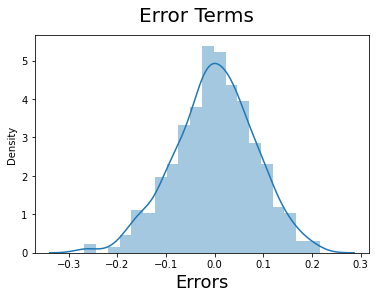

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_new), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [ ]:

df_test[num_cols] = scaler.transform(df_test[num_cols])

In [ ]:
y_test = df_test.pop('yf')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:

y_pred 

567    0.335292
109    0.358740
440    0.398635
19     0.320767
652    0.232952
         ...   
100    0.234500
260    0.309017
211    0.711806
534    0.252002
581    0.239840
Length: 225, dtype: float64

# Model Evaluation

Text(0, 0.5, 'y_pred')

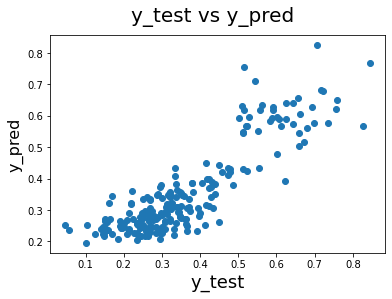

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label